In [32]:
# Load common modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [33]:
# Load data
import scipy.io
mat = scipy.io.loadmat('./data/lung.mat')

# Merge to dataframe
data = pd.DataFrame(np.concatenate((mat["X"], mat["Y"]), axis=1))

# Delete instances with class label 5
filter = data.iloc[:, -1] != 5
data = data[filter]

# Split again into X and y
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1], dtype=int)

In [34]:
# Print number of instances and features
print("Number of instances: %d" % X.shape[0])
print("Number of features: %d" % X.shape[1])

# Count class labels
unique, counts = np.unique(y, return_counts=True)
print("Number of class labels:")
print(dict(zip(unique, counts)))

Number of instances: 197
Number of features: 3312
Number of class labels:
{1: 139, 2: 17, 3: 21, 4: 20}


In [35]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

# Feature scaling with standardization
X = StandardScaler().fit_transform(X)

In [36]:
# Split into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

selected_features = np.where(rfe.ranking_ == 1)
print("Selected features: ", selected_features[0] + 1)

X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)

Selected features:  [1318 1464 1765 1854 2701 2765 2841 2949 3175 3178]


In [38]:
# Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8, 10]}
]

forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)
    
forest_model = grid_search.best_estimator_

Best parameters:  {'max_features': 4, 'n_estimators': 50}
0.9363057324840764 {'max_features': 2, 'n_estimators': 3}
0.9554140127388535 {'max_features': 2, 'n_estimators': 10}
0.9554140127388535 {'max_features': 2, 'n_estimators': 30}
0.9490445859872612 {'max_features': 2, 'n_estimators': 50}
0.9554140127388535 {'max_features': 2, 'n_estimators': 100}
0.910828025477707 {'max_features': 4, 'n_estimators': 3}
0.9426751592356688 {'max_features': 4, 'n_estimators': 10}
0.9490445859872612 {'max_features': 4, 'n_estimators': 30}
0.9681528662420382 {'max_features': 4, 'n_estimators': 50}
0.9617834394904459 {'max_features': 4, 'n_estimators': 100}
0.9299363057324841 {'max_features': 6, 'n_estimators': 3}
0.9490445859872612 {'max_features': 6, 'n_estimators': 10}
0.9554140127388535 {'max_features': 6, 'n_estimators': 30}
0.9426751592356688 {'max_features': 6, 'n_estimators': 50}
0.9617834394904459 {'max_features': 6, 'n_estimators': 100}
0.9171974522292994 {'max_features': 8, 'n_estimators': 3}


In [39]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

param_grid = [
    {'max_depth': [1, 5, 10, 50, 100]}
]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

tree_model = grid_search.best_estimator_

Best parameters:  {'max_depth': 5}
0.8089171974522293 {'max_depth': 1}
0.9171974522292994 {'max_depth': 5}
0.910828025477707 {'max_depth': 10}
0.9171974522292994 {'max_depth': 50}
0.9171974522292994 {'max_depth': 100}


In [40]:
# Support Vector Machine
from sklearn.svm import SVC

param_grid = [
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1.0]},
]

svc_clf = SVC()
grid_search = GridSearchCV(svc_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

svc_model = grid_search.best_estimator_

Best parameters:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.7070063694267515 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.7070063694267515 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.7070063694267515 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.7070063694267515 {'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}
0.7070063694267515 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.9554140127388535 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.9617834394904459 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.732484076433121 {'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}
0.9745222929936306 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.9745222929936306 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.9681528662420382 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.7515923566878981 {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
0.9808917197452229 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.9745222929936306 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.9681528662420382 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.7515923566878981 {'C':

In [41]:
from sklearn.linear_model import SGDClassifier

param_grid = [
    {'loss': ['log'],
     'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
     'max_iter': [1, 10, 100, 1000],}
]

sgd_clf = SGDClassifier()
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

sgd_model = grid_search.best_estimator_

Best parameters:  {'alpha': 0.001, 'loss': 'log', 'max_iter': 10}
0.9299363057324841 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 1}
0.9490445859872612 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 10}
0.9554140127388535 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 100}
0.9681528662420382 {'alpha': 0.0001, 'loss': 'log', 'max_iter': 1000}
0.9363057324840764 {'alpha': 0.001, 'loss': 'log', 'max_iter': 1}
0.9745222929936306 {'alpha': 0.001, 'loss': 'log', 'max_iter': 10}
0.9745222929936306 {'alpha': 0.001, 'loss': 'log', 'max_iter': 100}
0.9745222929936306 {'alpha': 0.001, 'loss': 'log', 'max_iter': 1000}
0.9554140127388535 {'alpha': 0.01, 'loss': 'log', 'max_iter': 1}
0.9745222929936306 {'alpha': 0.01, 'loss': 'log', 'max_iter': 10}
0.9681528662420382 {'alpha': 0.01, 'loss': 'log', 'max_iter': 100}
0.9681528662420382 {'alpha': 0.01, 'loss': 'log', 'max_iter': 1000}
0.9554140127388535 {'alpha': 0.1, 'loss': 'log', 'max_iter': 1}
0.9426751592356688 {'alpha': 0.1, 'loss': 'log', 'max_iter':

SGD
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1: 0.97


Confusion matrix
[[28  0  0  0]
 [ 1  4  0  0]
 [ 0  0  4  0]
 [ 0  0  0  3]]


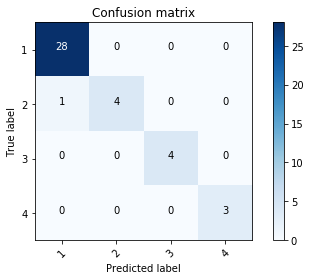

SVM
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1: 0.97


Confusion matrix
[[28  0  0  0]
 [ 1  4  0  0]
 [ 0  0  4  0]
 [ 0  0  0  3]]


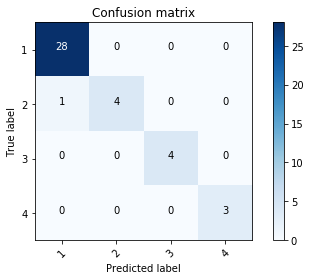

Decision Tree
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1: 0.95


Confusion matrix
[[27  0  1  0]
 [ 1  4  0  0]
 [ 0  0  4  0]
 [ 0  0  0  3]]


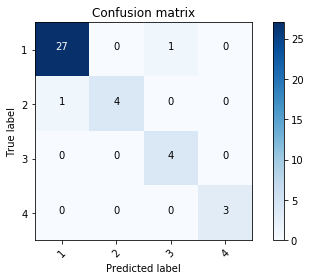

Random Forest
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1: 0.97


Confusion matrix
[[28  0  0  0]
 [ 1  4  0  0]
 [ 0  0  4  0]
 [ 0  0  0  3]]


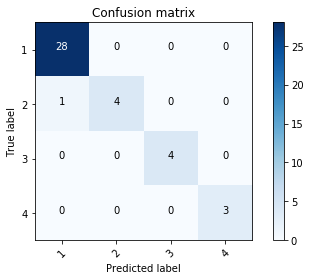

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


import itertools
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    print('Confusion matrix')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    
class_names = ["1", "2", "3", "4"]

models = {'SGD': sgd_model, 'SVM': svc_model, 'Decision Tree': tree_model,'Random Forest': forest_model}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    predictions = model.predict(X_test)  # make predictions on test set
    
    # Print evaluation scores
    print(name)
    print("Accuracy: %.2f" % accuracy_score(y_test, predictions))
    print('Precision: %.2f' % precision_score(y_test, predictions, average="micro"))
    print("Recall: %.2f" % recall_score(y_test, predictions, average="micro"))
    print('F1: %.2f' % f1_score(y_test, predictions, average="micro"))
    print("\n")
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, predictions)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
    plt.show()